# Setup
Install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt):

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt
!pip install -q onnx onnxruntime

import torch
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# Define streamer
Insert the name of a Twitch.tv streamer, who’s currently online, playing Valorant.

In [2]:
streamer_name = 'stewie2k' #@param {type:"string"}

# Inference
- Downloads the YOLOv5s model from PyTorch Hub
- Fetches the preview image of the selected stream
- Prepares the image and does the inference.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-27 Python-3.8.10 torch-1.13.1+cu116 CPU

Loading best.onnx for ONNX Runtime inference...
Adding AutoShape... 


0.00B [00:00, ?B/s]

          xmin        ymin        xmax        ymax  confidence  class  \
0   110.983154  129.767685  151.290070  169.981308    0.962700     61   
1   242.874329  130.001587  282.978455  170.034210    0.956606     59   
2   423.643951   29.827288  464.312775   70.155212    0.955730     31   
3   226.179520   30.422523  265.778809   70.353828    0.953767     37   
4   489.891602   30.018820  529.861145   70.020561    0.952816     43   
5   374.688904  130.037659  415.091492  170.030121    0.952151     57   
6   358.181915   29.938074  398.153412   69.956192    0.951360     41   
7   308.910339  130.142639  348.783325  169.814514    0.951131     62   
8   177.058670  129.977982  217.206711  169.860916    0.950049     51   
9   292.072815   30.131592  331.846741   70.067276    0.949909     44   
10   19.388641  134.851852   56.118683  165.345901    0.911568     10   
11  584.524170   35.128677  619.724243   66.382034    0.783919     11   

               name  
0      omen_flipped  
1   ki

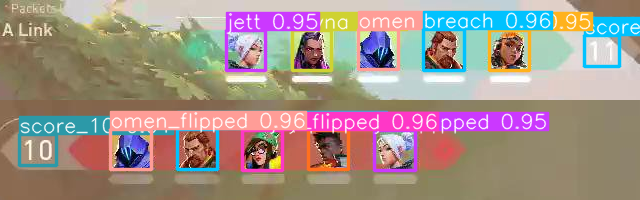

In [3]:
# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', 'model/best.onnx')

# Define image
print("Downloading screenshot of streamer: " + streamer_name)
url = "https://static-cdn.jtvnw.net/previews-ttv/live_user_{}-1920x1080.jpg".format(streamer_name)

# Download image
torch.hub.download_url_to_file(url, "image.jpg")

# Prepare image
img = cv2.imread("image.jpg")
m = np.zeros((640, 640, 3), dtype=np.uint8)
m[0:200, :, :3] = cv2.vconcat([img[0:100, 220:860], img[0:100, 1060:-220]])
img = m[:, :, ::-1]

# Inference
results = model(img)

print(results.pandas().xyxy[0])
cv2_imshow(np.squeeze(results.render())[:200, :, ::-1])